In [1]:
import pickle
import pandas as pd
import numpy as np
from regression_class import RedditRegression as RR
import logging
import os
import gc
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches

In [2]:
DATE = "09_04_2024"
RESULTS_DIR_PREFIX = f"regression_outputs/{DATE}_"
RESULTS_DIR_SUFFIX = "/results"
OUT_DIR_SUFFIX = "/outputs"
RUN_NAMES = ["c7_m7", "c7_m14", "c14_m7"]
LOGFILE = f"{RESULTS_DIR_PREFIX}_31052024"


OUT_DIR_COMBINED = f"regression_outputs/{DATE}_outputs"

In [3]:
all_filepaths = []
for run_name in RUN_NAMES:
    results_dir = RESULTS_DIR_PREFIX + run_name + RESULTS_DIR_SUFFIX

    filepaths = [f"{results_dir}/{x}" for x in os.listdir(results_dir) if 'books' not in x]
    all_filepaths += filepaths

In [4]:
mnlogit_filepaths = [x for x in all_filepaths if 'mnlogit' in x]
linear_filepaths = [x for x in all_filepaths if 'linear' in x]

In [21]:
minmax_aucs_dict = {
    'subreddit': [],
    'collection window': [],
    'calibration window': [],
    'min cal auc': [],
    'min cal num features': [],
    'max cal auc': [],
    'max cal num features': [],
    'mean cal auc': [],
    'min val auc': [],
    'min val num features': [],
    'max val auc': [],
    'max val num features': [],
    'mean val auc': [],
}

minmax_accuracy_dict = {
    'subreddit': [],
    'collection window': [],
    'calibration window': [],
    'min cal accuracy': [],
    'min cal num features': [],
    'max cal accuracy': [],
    'max cal num features': [],
    'mean cal accuracy': [],
    'min val accuracy': [],
    'min val num features': [],
    'max val accuracy': [],
    'max val num features': [],
    'mean val accuracy': [],
}

minmax_r2_dict = {
    'subreddit': [],
    'collection window': [],
    'calibration window': [],
    'min cal r2': [],
    'min cal num features': [],
    'max cal r2': [],
    'max cal num features': [],
    'mean cal r2': [],
    'min val r2': [],
    'min val num features': [],
    'max val r2': [],
    'max val num features': [],
    'mean val r2': [],
}

params_lookup_dict = {
    'subreddit': 'name',
    'collection window': 'collection_window',
    'calibration window': 'model_window',
}

auc_lookup_dict = {
    'min cal auc': ('cal_mnlogit_mean_auc', 'min'),
    'min cal num features': ('cal_mnlogit_mean_auc', 'idxmin'),
    'max cal auc': ('cal_mnlogit_mean_auc',  'max'),
    'max cal num features': ('cal_mnlogit_mean_auc', 'idxmax'),
    'mean cal auc': ('cal_mnlogit_mean_auc', 'mean'),
    'min val auc': ('val_mnlogit_mean_auc', 'min'),
    'min val num features': ('val_mnlogit_mean_auc', 'idxmin'),
    'max val auc': ('val_mnlogit_mean_auc', 'max'),
    'max val num features': ('val_mnlogit_mean_auc', 'idxmax'),
    'mean val auc': ('val_mnlogit_mean_auc', 'mean')
}

accuracy_lookup_dict = {
    'min cal accuracy': ('cal_mnlogit_accuracy', 'min'),
    'min cal num features': ('cal_mnlogit_accuracy', 'idxmin'),
    'max cal accuracy': ('cal_mnlogit_accuracy',  'max'),
    'max cal num features': ('cal_mnlogit_accuracy', 'idxmax'),
    'mean cal accuracy': ('cal_mnlogit_accuracy', 'mean'),
    'min val accuracy': ('val_mnlogit_accuracy', 'min'),
    'min val num features': ('val_mnlogit_accuracy', 'idxmin'),
    'max val accuracy': ('val_mnlogit_accuracy', 'max'),
    'max val num features': ('val_mnlogit_accuracy', 'idxmax'),
    'mean val accuracy': ('val_mnlogit_accuracy', 'mean'),
}

r2_lookup_dict = {
    'min cal r2': ('cal_r2', 'min'),
    'min cal num features': ('cal_r2', 'idxmin'),
    'max cal r2': ('cal_r2',  'max'),
    'max cal num features': ('cal_r2', 'idxmax'),
    'mean cal r2': ('cal_r2', 'mean'),
    'min val r2': ('val_r2', 'min'),
    'min val num features': ('val_r2', 'idxmin'),
    'max val r2': ('val_r2', 'max'),
    'max val num features': ('val_r2', 'idxmax'),
    'mean val r2': ('val_r2', 'mean'),
}

In [22]:
for i, filename in enumerate(mnlogit_filepaths + linear_filepaths):
    print(f"{i+1} of {len(mnlogit_filepaths + linear_filepaths)}")
    print(filename)
    redreg = pickle.load(open(filename, 'rb'))
    regparams = redreg.regression_params
    if filename in linear_filepaths:
        print('linear')
        active_dicts = [minmax_r2_dict]
        lookup_dicts = [r2_lookup_dict]
    else:
        active_dicts = [minmax_aucs_dict, minmax_accuracy_dict]
        lookup_dicts = [auc_lookup_dict, accuracy_lookup_dict]
    
    print(active_dicts)
    for active_dict in active_dicts:
        for param in params_lookup_dict:
            active_dict[param].append(regparams[params_lookup_dict[param]])
    regmetrics = redreg.regression_metrics['metrics']
    for j, active_dict in enumerate(active_dicts):
        lookup_dict = lookup_dicts[j]
        for metric in [x for x in active_dict if x not in params_lookup_dict]:
            val_tuple = lookup_dict[metric]
            print(metric, val_tuple)
            active_dict[metric].append(
            getattr(regmetrics[val_tuple[0]], val_tuple[1])()
        )


1 of 18
regression_outputs/09_04_2024_c7_m7/results/conspiracy_mnlogit.p
[{'subreddit': [], 'collection window': [], 'calibration window': [], 'min cal auc': [], 'min cal num features': [], 'max cal auc': [], 'max cal num features': [], 'mean cal auc': [], 'min val auc': [], 'min val num features': [], 'max val auc': [], 'max val num features': [], 'mean val auc': []}, {'subreddit': [], 'collection window': [], 'calibration window': [], 'min cal accuracy': [], 'min cal num features': [], 'max cal accuracy': [], 'max cal num features': [], 'mean cal accuracy': [], 'min val accuracy': [], 'min val num features': [], 'max val accuracy': [], 'max val num features': [], 'mean val accuracy': []}]
min cal auc ('cal_mnlogit_mean_auc', 'min')
min cal num features ('cal_mnlogit_mean_auc', 'idxmin')
max cal auc ('cal_mnlogit_mean_auc', 'max')
max cal num features ('cal_mnlogit_mean_auc', 'idxmax')
mean cal auc ('cal_mnlogit_mean_auc', 'mean')
min val auc ('val_mnlogit_mean_auc', 'min')
min val nu

In [7]:
minmax_aucs_dict

{'subreddit': ['conspiracy',
  'crypto',
  'politics',
  'conspiracy',
  'crypto',
  'politics',
  'conspiracy',
  'crypto',
  'politics'],
 'collection window': [7, 7, 7, 7, 7, 7, 14, 14, 14],
 'calibration window': [7, 7, 7, 14, 14, 14, 7, 7, 7],
 'min calibration auc': [0.6599900737379467,
  0.6352472899728999,
  0.5822871581743065,
  0.69078039069875,
  0.6344350417942654,
  0.5905829179246529,
  0.712184223822155,
  0.6496658618669278,
  0.5996124419369425],
 'min cal num features': [1, 1, 3, 1, 2, 3, 1, 5, 1],
 'max calibration auc': [0.7330732207800874,
  0.6581030958614671,
  0.6091284175922922,
  0.7640984591951371,
  0.6560473632014299,
  0.6180532557423031,
  0.804000884173298,
  0.6860813989363056,
  0.6351759362025733],
 'max cal num features': [7, 9, 10, 8, 9, 9, 9, 1, 8],
 'mean calibration auc': [0.724171073704581,
  0.6502926771852464,
  0.5984270817271138,
  0.7536552373110628,
  0.6496296392880108,
  0.6066713796427613,
  0.7876479411393205,
  0.6720068384390471,
  0

In [8]:
aucs_df = pd.DataFrame.from_dict(minmax_aucs_dict, orient='index').T

In [11]:
aucs_df = aucs_df.sort_values(by='subreddit')

In [12]:
aucs_df

,subreddit,collection window,calibration window,min calibration auc,min cal num features,max calibration auc,max cal num features,mean calibration auc,min validation auc,min val num features,max validation auc,max val num features,mean validation auc
0,conspiracy,7,7,0.65999,1,0.733073,7,0.724171,0.719147,1,0.790646,7,0.780364
3,conspiracy,7,14,0.69078,1,0.764098,8,0.753655,0.6596,1,0.72722,4,0.715351
6,conspiracy,14,7,0.712184,1,0.804001,9,0.787648,0.687336,1,0.732236,2,0.716292
1,crypto,7,7,0.635247,1,0.658103,9,0.650293,0.629878,2,0.658302,1,0.64138
4,crypto,7,14,0.634435,2,0.656047,9,0.64963,0.619152,3,0.668933,1,0.641061
7,crypto,14,7,0.649666,5,0.686081,1,0.672007,0.641978,6,0.685723,1,0.662302
2,politics,7,7,0.582287,3,0.609128,10,0.598427,0.595435,3,0.619814,7,0.611183
5,politics,7,14,0.590583,3,0.618053,9,0.606671,0.582389,2,0.615042,8,0.601815
8,politics,14,7,0.599612,1,0.635176,8,0.627015,0.591707,1,0.639025,9,0.626065


In [13]:
with pd.ExcelWriter('regression_outputs/09_04_2024_results/logistic_aucs.xlsx') as writer:
    aucs_df.to_excel(writer, index=False)

In [104]:
OUTDIR = 'regression_outputs/09_04_2024_results/'

In [15]:
boxplot_datasets = {'crypto': {}, 'conspiracy': {}, 'politics': {}}

In [16]:
for i, filename in enumerate(logistic_filepaths):
    print(f"{i+1} of {len(logistic_filepaths)}")
    print(filename)
    redreg = pickle.load(open(filename, 'rb'))
    regparams = redreg.regression_params
    subreddit = regparams['name']
    case_type = f"c{regparams['collection_window']}_m{regparams['model_window']}"
    boxplot_datasets[subreddit][case_type] = {}
    regmetrics = redreg.regression_metrics['metrics']
    for metric in ['cal_auc', 'val_auc']:
        boxplot_datasets[subreddit][case_type][metric] = regmetrics[metric]
        

1 of 9
regression_outputs/09_04_2024_c7_m7/results/conspiracy_logistic.p
2 of 9
regression_outputs/09_04_2024_c7_m7/results/crypto_logistic.p
3 of 9
regression_outputs/09_04_2024_c7_m7/results/politics_logistic.p
4 of 9
regression_outputs/09_04_2024_c7_m14/results/conspiracy_logistic.p
5 of 9
regression_outputs/09_04_2024_c7_m14/results/crypto_logistic.p
6 of 9
regression_outputs/09_04_2024_c7_m14/results/politics_logistic.p
7 of 9
regression_outputs/09_04_2024_c14_m7/results/conspiracy_logistic.p
8 of 9
regression_outputs/09_04_2024_c14_m7/results/crypto_logistic.p
9 of 9
regression_outputs/09_04_2024_c14_m7/results/politics_logistic.p


In [31]:
plt_colours = list(mcolors.TABLEAU_COLORS.keys())

In [32]:
plt_colours

['tab:blue',
 'tab:orange',
 'tab:green',
 'tab:red',
 'tab:purple',
 'tab:brown',
 'tab:pink',
 'tab:gray',
 'tab:olive',
 'tab:cyan']

In [89]:
SMALLEST_SIZE = 10
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALLEST_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

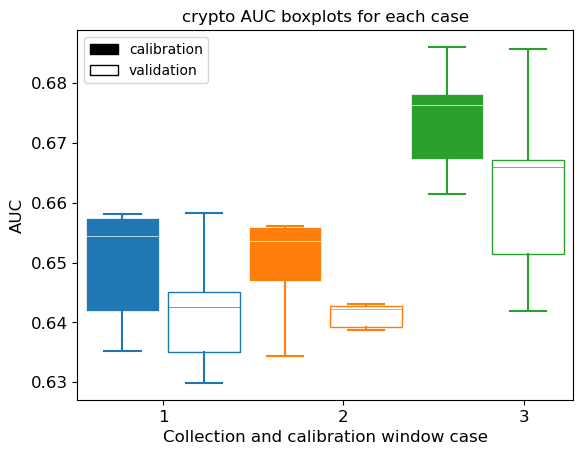

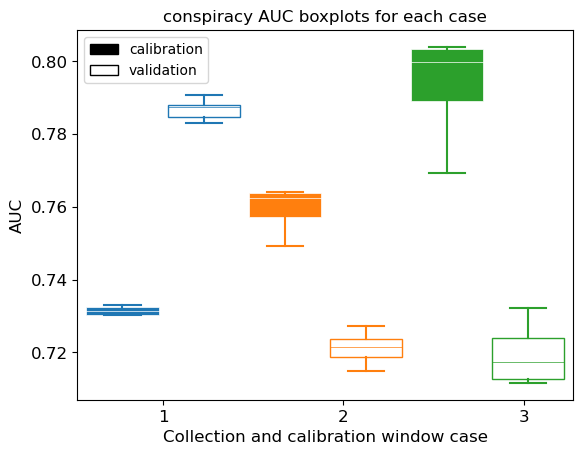

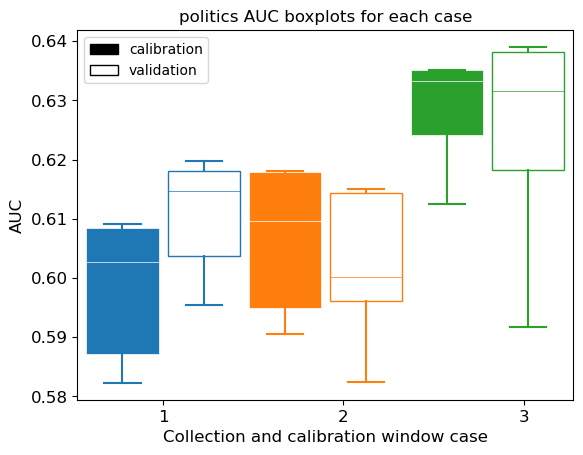

In [109]:

x_pos = 2
size = 0.8
spacing = size+0.1
x_pos = 2
x_spacing = size*2 + 0.2

for subreddit in boxplot_datasets:
        #plt.clf()
        fig, ax = plt.subplots(1)
        for i, case in enumerate(boxplot_datasets[subreddit]):
                pos = x_pos + i*x_spacing
                calbox = ax.boxplot(boxplot_datasets[subreddit][case]['cal_auc'], positions=[pos], widths=size, patch_artist=True, showfliers=False, 
                medianprops={"color": "white", "linewidth": 0.5},
                #showmeans=True, meanprops={"color": "black", "linewidth": 0.5}, meanline=True,
                boxprops={"facecolor": plt_colours[i], "edgecolor": "white", "linewidth": 0.5},
                whiskerprops={"color": plt_colours[i], "linewidth": 1.5},
                capprops={"color": plt_colours[i], "linewidth": 1.5},
                labels=['calibration']
                )

                valbox = ax.boxplot(boxplot_datasets[subreddit][case]['val_auc'], positions=[pos+spacing], widths=size, patch_artist=True, showfliers=False, 
                medianprops={"color": plt_colours[i], "linewidth": 0.5},
                #showmeans=True, meanprops={"color": "black", "linewidth": 0.5}, meanline=True,
                boxprops={"facecolor": "white", "edgecolor": plt_colours[i],
                        "linewidth": 1, "linestyle": 'dotted'},
                whiskerprops={"color": plt_colours[i], "linewidth": 1.5},
                capprops={"color": plt_colours[i], "linewidth": 1.5},
                labels=['validation']
                )
        filled_patch = mpatches.Patch(color='black', label='calibration')
        outlined_patch = mpatches.Patch(color='black', label='validation', fill=False)
        ax.legend(handles=[filled_patch, outlined_patch])
        ax.set(xticks=[x_pos+spacing/2,2*x_pos+spacing/2,3*x_pos + spacing/2], xticklabels = ['1', '2', '3'], xlabel='Collection and calibration window case', ylabel='AUC', title=f'{subreddit} AUC boxplots for each case')
        plt.savefig(f'{OUTDIR}/auc_boxplots_{subreddit}.png')
        plt.show()

In [73]:
for i, filename in enumerate(logistic_filepaths):
    print(f"{i+1} of {len(logistic_filepaths)}")
    print(filename)
    redreg = pickle.load(open(filename, 'rb'))
    regparams = redreg.regression_params
    for param in params_lookup_dict:
        minmax_aucs_dict[param].append(regparams[params_lookup_dict[param]])
    regmetrics = redreg.regression_metrics['metrics']
    for metric in lookup_dict:
        val_tuple = lookup_dict[metric]
        minmax_aucs_dict[metric].append(
            getattr(regmetrics[val_tuple[0]], val_tuple[1])()
        )

([], [])

In [114]:
redreg.FSS_metrics['metric_df']

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(9,)",[0.5996124419369425],0.599612,"(domain_count,)",NaN,0.0,NaN
2,"(7, 9)",[0.6125241501212645],0.612524,"(author_all_activity_count, domain_count)",NaN,0.0,NaN
3,"(4, 7, 9)",[0.6225856301640152],0.622586,"(activity_ratio, author_all_activity_count, do...",NaN,0.0,NaN
4,"(2, 4, 7, 9)",[0.6285999095655034],0.628600,"(time_in_secs, activity_ratio, author_all_acti...",NaN,0.0,NaN
5,"(2, 4, 6, 7, 9)",[0.6315932400213754],0.631593,"(time_in_secs, activity_ratio, mean_author_sen...",NaN,0.0,NaN
6,"(2, 4, 6, 7, 8, 9)",[0.6348691782792781],0.634869,"(time_in_secs, activity_ratio, mean_author_sen...",NaN,0.0,NaN
7,"(1, 2, 4, 6, 7, 8, 9)",[0.6350888416163112],0.635089,"(sentiment_magnitude, time_in_secs, activity_r...",NaN,0.0,NaN
8,"(1, 2, 4, 5, 6, 7, 8, 9)",[0.6351774776996753],0.635177,"(sentiment_magnitude, time_in_secs, activity_r...",NaN,0.0,NaN
9,"(1, 2, 3, 4, 5, 6, 7, 8, 9)",[0.6351004028445759],0.635100,"(sentiment_magnitude, time_in_secs, num_dayofw...",NaN,0.0,NaN
10,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)",[0.6349596127759279],0.634960,"(sentiment_sign, sentiment_magnitude, time_in_...",NaN,0.0,NaN


In [133]:
def get_feature_list(feature_names:pd.Series):

    feature_list = []
    for i, feat_tuple in enumerate(feature_names):

        if i == 0:
            feature_list.append(feat_tuple[0])
        else:
            new_feature = [x for x in feat_tuple if x not in feature_list]
            feature_list += new_feature


    return feature_list

In [134]:
features_dict = {'conspiracy': {}, 'crypto': {}, 'politics': {}}

In [135]:
for i, filename in enumerate(logistic_filepaths):
    print(f"{i+1} of {len(logistic_filepaths)}")
    print(filename)
    redreg = pickle.load(open(filename, 'rb'))
    regparams = redreg.regression_params
    name = regparams['name']
    col_case = f"c{regparams['collection_window']}_m{regparams['model_window']}"
    print(redreg.FSS_metrics['metric_df'].feature_names)
    features_dict[name][col_case] = get_feature_list(redreg.FSS_metrics['metric_df'].feature_names)

1 of 9
regression_outputs/09_04_2024_c7_m7/results/conspiracy_logistic.p
1                                     (activity_ratio,)
2                        (activity_ratio, domain_count)
3     (activity_ratio, mean_author_sentiment_sign, d...
4     (sentiment_magnitude, activity_ratio, mean_aut...
5     (sentiment_sign, sentiment_magnitude, activity...
6     (sentiment_sign, sentiment_magnitude, num_dayo...
7     (sentiment_sign, sentiment_magnitude, num_dayo...
8     (sentiment_sign, sentiment_magnitude, num_dayo...
9     (sentiment_sign, sentiment_magnitude, time_in_...
10    (sentiment_sign, sentiment_magnitude, time_in_...
Name: feature_names, dtype: object
2 of 9
regression_outputs/09_04_2024_c7_m7/results/crypto_logistic.p
1                          (author_all_activity_count,)
2             (author_all_activity_count, domain_count)
3     (activity_ratio, author_all_activity_count, do...
4     (activity_ratio, mean_author_sentiment_magnitu...
5     (sentiment_magnitude, activity_ra

In [148]:
with pd.ExcelWriter(f'{OUTDIR}/logistic_features.xlsx') as writer:
    for subreddit in features_dict:
        df = pd.DataFrame.from_dict(features_dict[subreddit])
        df = df.reset_index(names='feature')
        df['feature'] = df.feature + 1
        df.to_excel(writer, sheet_name=subreddit, index=False)